In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Processing libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# Model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

# Testing libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, roc_curve, auc

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
sns.set(font_scale=1.8)

In [2]:
data = pd.read_csv("Dataset/googleplaystore.csv",encoding='utf-8')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Data Preprocessing

In [3]:
#checking NaN values
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [4]:
data["Category"].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [5]:
data[data["Category"] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [6]:
data.drop(data.index[10472], inplace = True)

In [7]:
#Handling NaN values on Rating feature
data['Rating'] = data['Rating'].fillna(data['Rating'].mean())

In [8]:
data['Type'].value_counts()


Free    10039
Paid      800
Name: Type, dtype: int64

In [9]:
#Handling Nan values of Type feature
data['Type'].fillna("Free", inplace = True)
#data["Type"] = data["Type"].apply(lambda x: 0 if x == "0" or x == "Free" else 1)



In [10]:
data['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [11]:
#Handling NaN values of Content Rating feature
data["Content Rating"].fillna("Everyone", inplace = True)


In [12]:
data['Current Ver'].value_counts()

Varies with device    1459
1.0                    809
1.1                    264
1.2                    178
2.0                    151
                      ... 
5.44.1                   1
7.16.8                   1
04.08.00                 1
2.10.06                  1
2.0.148.0                1
Name: Current Ver, Length: 2831, dtype: int64

In [13]:
#Handling NaN values of Current Ver feature
data["Current Ver"].fillna("Varies with device", inplace = True)

In [14]:
data['Android Ver'].value_counts()

4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

In [15]:
#Handling NaN values of Android Ver feature
data["Android Ver"].fillna("4.1 and up", inplace = True)

In [16]:
#Checking for NaN values again
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [17]:
data["Price"] = data["Price"].apply(lambda x: x.replace("$", ''))
data["Price"].value_counts()
data["Price"] = data["Price"].replace("Everyone", "0")
data['Price']=data['Price'].astype('float')

In [18]:
data["Size"].value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
430k                     1
429k                     1
200k                     1
460k                     1
619k                     1
Name: Size, Length: 461, dtype: int64

In [19]:
def convert_size(x):
    if 'k' in x:
        x = float(x.replace('k','')) 
        x /= 1024
    return x

#Si considera per semplicità la dimensione dell'app in MB
data["Size"] = data["Size"].apply(lambda x: x.replace("M",''))
data["Size"] = data["Size"].apply(lambda x: convert_size(x))
data['Size'] = data['Size'].replace("Varies with device",np.nan)
data['Size'] = data['Size'].replace("1,000+","1.000")
data['Size'] = data['Size'].astype('float')
data['Size'] = data['Size'].fillna(data['Size'].mean())
data["Size"].value_counts()

21.516165    1695
11.000000     198
12.000000     196
14.000000     194
13.000000     191
             ... 
0.419922        1
0.418945        1
0.195312        1
0.449219        1
0.604492        1
Name: Size, Length: 460, dtype: int64

In [20]:
data["Installs"].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: Installs, dtype: int64

In [21]:
data["Installs"] = data["Installs"].map(lambda x: x.replace('+',''))
data["Installs"] = data["Installs"].map(lambda x: x.replace(',',''))
data["Installs"] = data["Installs"].map(lambda x: x.replace('Free','0'))
data["Installs"].value_counts()

1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: Installs, dtype: int64

In [22]:
data['Reviews'] = data.Reviews.replace("0.0","0")
data['Reviews'] = data.Reviews.replace("3.0M","3000000")

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  float64
 5   Installs        10840 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.2+ MB


In [24]:
data.duplicated().value_counts()

False    10357
True       483
dtype: int64

In [25]:
data.drop_duplicates(inplace=True) 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          10357 non-null  float64
 3   Reviews         10357 non-null  object 
 4   Size            10357 non-null  float64
 5   Installs        10357 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10357 non-null  float64
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10357 non-null  object 
 12  Android Ver     10357 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.1+ MB


In [26]:
data['Last Updated']=pd.to_datetime(data['Last Updated'])
data['Installs']=data['Installs'].astype('int')
data['Reviews']=data['Reviews'].astype('int')
data.describe()

,Rating,Reviews,Size,Installs,Price
count,10357.000000,1.035700e+04,10357.000000,1.035700e+04,10357.000000
mean,4.188426,4.059046e+05,21.321117,1.415776e+07,1.030800
std,0.484022,2.696778e+06,20.813874,8.023955e+07,16.278625
min,1.000000,0.000000e+00,0.008301,0.000000e+00,0.000000
25%,4.100000,3.200000e+01,5.700000,1.000000e+03,0.000000
50%,4.200000,1.680000e+03,17.000000,1.000000e+05,0.000000
75%,4.500000,4.641600e+04,26.000000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


# Data Visualization

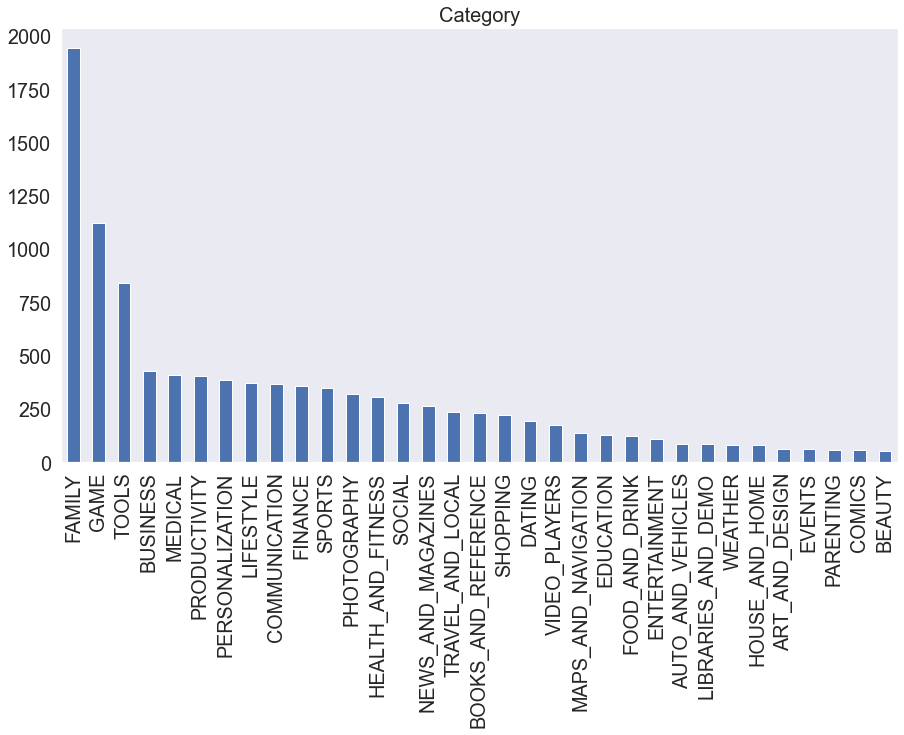

In [27]:
#Content Rating

plt.figure(figsize=(15,8))
data['Category'].value_counts().plot(kind='bar')
#sns.distplot(data['Category'], kde=False)
plt.title('Category', fontsize = 20)
plt.rcParams.update({'font.size': 10})

plt.grid()
plt.show()

In [28]:
#data["Genres"].value_counts()[:9]#.index.tolist()

In [29]:
#genres = data["Genres"].value_counts()[:9].index.tolist()
#genres = data["Genres"].unique()
#genres = map(lambda x: x.split(';'), genres)
#genres_flat = []
#[genres_flat.extend(genre) for genre in genres]
#genres = list(dict.fromkeys(genres_flat))
#genres = sorted(genres)
#print(genres)

In [30]:
#data = data[(data['Genres'] == "Entertainment") | (data['Genres'] == "Education") | (data['Genres'] == "Action") | (data['Genres'] == "Arcade") | (data['Genres'] == "Simulation") | (data['Genres'] == "Casual") | (data['Genres'] == "Puzzle") | (data['Genres'] == "Role Playing") | (data['Genres'] == "Strategy") ]

In [31]:
# Drop useless columns
#data = data.drop(['Category','App', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'], axis=1)

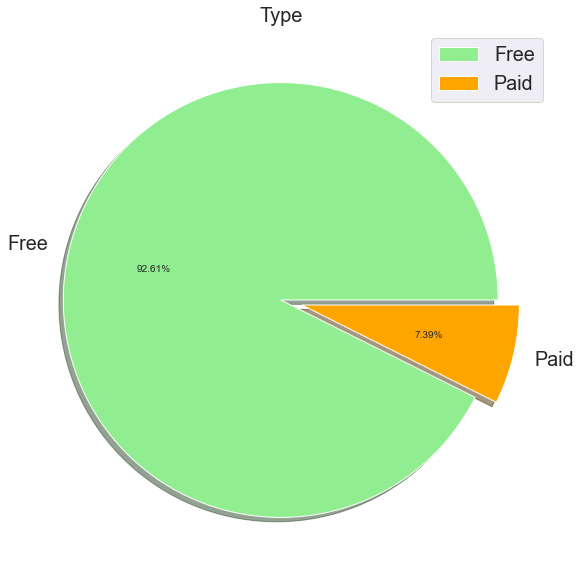

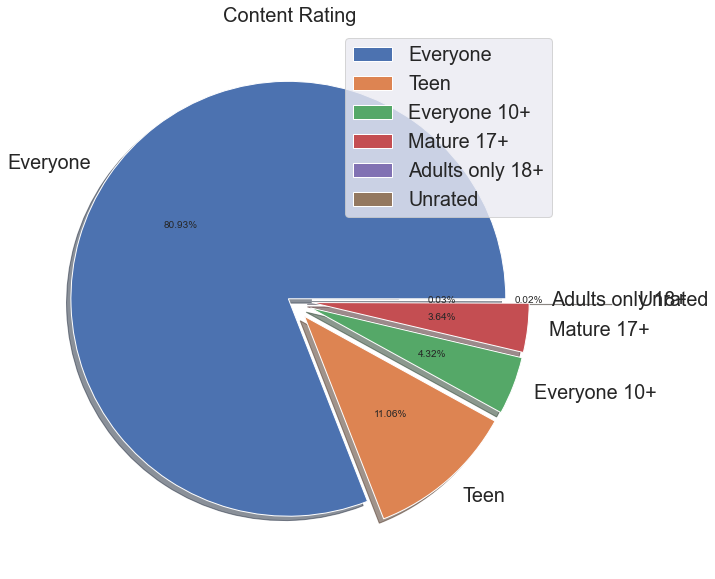

"\nplt.figure(figsize=(10,10))\ndata['Content Rating'].value_counts().plot(kind='bar')\n\nplt.grid()\nplt.show()\n"

In [32]:
#Type chart
labels = data['Type'].unique()
size = data['Type'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.1]

plt.figure(figsize=(18,10))
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Type', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

#Content Rating

labels = data["Content Rating"].unique()
size = data['Content Rating'].value_counts()
explode=[0.01,0.1,0.1,0.1,0.1,0.5]

plt.figure(figsize=(18,10))
plt.pie(size, shadow = True, labels = labels, autopct = '%.2f%%',explode=explode)
plt.title('Content Rating', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()
"""
plt.figure(figsize=(10,10))
data['Content Rating'].value_counts().plot(kind='bar')

plt.grid()
plt.show()
"""

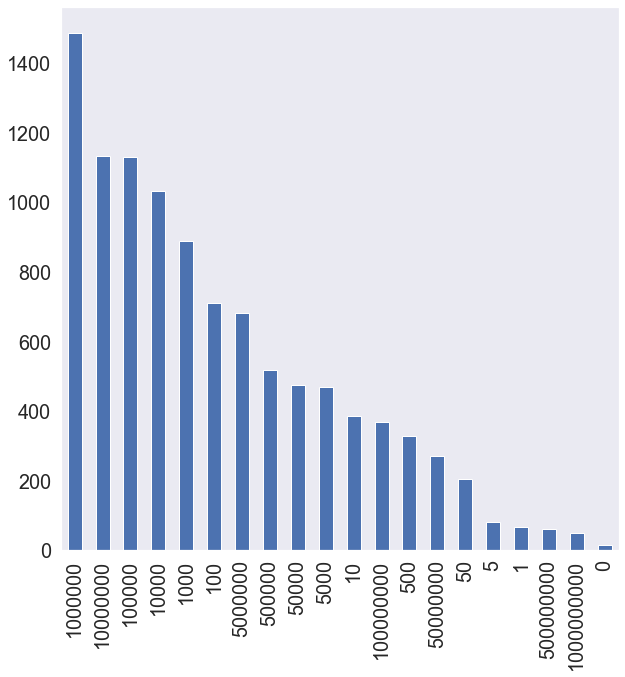

In [33]:
#Installs
plt.figure(figsize=(10,10))
data['Installs'].value_counts().plot(kind='bar')

plt.grid()
plt.show()

In [34]:
#Genres
"""
plt.figure(figsize=(10,10))
data['Genres'].value_counts().plot(kind='bar')
plt.title('Genres', fontsize = 20)

plt.grid()
plt.show()
"""

"\nplt.figure(figsize=(10,10))\ndata['Genres'].value_counts().plot(kind='bar')\nplt.title('Genres', fontsize = 20)\n\nplt.grid()\nplt.show()\n"

<Figure size 2880x1440 with 0 Axes>

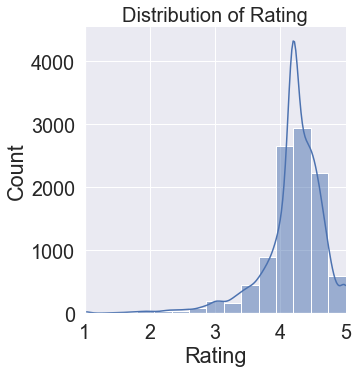

In [35]:
#Rating Distribution
plt.figure(figsize=(40,20))
sns.displot(data['Rating'], kde=True, bins=15)
plt.xlim([1, 5])
plt.title('Distribution of Rating', fontsize = 20)
plt.show()

In [ ]:
data = data.drop_duplicates(subset = 'App', keep="first")

In [ ]:
#Prime 10 applicazioni più scaricate
data_ordered = data.sort_values(by = ['Reviews', 'Rating'], ascending = False)
most_app_install = data_ordered.head(10)


In [38]:
#Prime 10 applicazioni

In [39]:
sns.pairplot(data)

Error in callback <function flush_figures at 0x000001F864DD5670> (for post_execute):


KeyboardInterrupt: 

In [40]:
# Create dummies - for better model outcomes
data = pd.get_dummies(data, prefix = ['Type','Content Rating'], columns = ['Type','Content Rating'])
data.head()

,App,Category,Rating,Reviews,Size,Installs,Price,Genres,Last Updated,Current Ver,Android Ver,Type_Free,Type_Paid,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,0.0,Art & Design,2018-01-07,1.0.0,4.0.3 and up,1,0,0,1,0,0,0,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,0.0,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,1,0,0,1,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,0.0,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,0,0,1,0,0,0,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,0.0,Art & Design,2018-06-08,Varies with device,4.2 and up,1,0,0,0,0,0,1,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,0.0,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,1,0,0,1,0,0,0,0


In [41]:
#Data Normalization
names = data.columns
scaler = MinMaxScaler()
scaled_d = scaler.fit_transform(data[["Rating", "Reviews", "Size", "Installs", "Price"]])
data[["Rating", "Reviews", "Size", "Installs","Price"]] = scaled_d
data.head()

,App,Category,Rating,Reviews,Size,Installs,Price,Genres,Last Updated,Current Ver,Android Ver,Type_Free,Type_Paid,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,0.775,0.000002,0.189933,0.00001,0.0,Art & Design,2018-01-07,1.0.0,4.0.3 and up,1,0,0,1,0,0,0,0
1,Coloring book moana,ART_AND_DESIGN,0.725,0.000012,0.139929,0.00050,0.0,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,1,0,0,1,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,0.925,0.001120,0.086924,0.00500,0.0,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,0,0,1,0,0,0,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,0.875,0.002759,0.249938,0.05000,0.0,Art & Design,2018-06-08,Varies with device,4.2 and up,1,0,0,0,0,0,1,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,0.825,0.000012,0.027919,0.00010,0.0,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,1,0,0,1,0,0,0,0


In [42]:
#Controlliamo se il dataset è bilanciato
data["Category"] = pd.Series(category)

#class balance
ld = data[data.Category == 0]
no_ld = data[data.Category == 1]
print("FAMILY: ", len(ld), " GAMES: ", len(no_ld))

NameError: name 'category' is not defined

In [ ]:
#Bilanciamento del dataset

balanced_d = pd.concat([no_ld, ld.sample(len(no_ld))])
x = balanced_d.iloc[:,:-1]
y = balanced_d.iloc[:,-1:]
balanced_d.shape

# CORRELATION ANALYSIS

In [ ]:
#Si mantengono solo le due categorie più frequenti
data = data[(data['Category'] == "GAME") | (data['Category'] == "FAMILY") ]
data["Category"] = data["Category"].map(lambda x: 0 if x == "FAMILY" else 1)
category = data["Category"]

In [ ]:
#Check for correlation
# Check for correlation
plt.figure(figsize=(20,10))
ax = sns.heatmap(data.corr(),cmap="Reds",annot=True,annot_kws={"size": 15})

In [ ]:
# Drop values to avoid variables with too high correlation
data = data.drop(['Type_Free','Content Rating_Unrated'], axis = 1)

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.heatmap(data.corr(),cmap="Reds",annot=True,annot_kws={"size": 15})

# CLASSIFICATION

In [ ]:
# Random state (serve per dare la stessa randomicità agli algoritmi: permette di avere la stessa inizializzazione)
rs = 42

#Si divide il dataset in 80% train e 20% test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rs)

# look at the shape of the data (many problems can arise from wrong shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
# List of classifiers:
classifiers = [
    LogisticRegression(random_state = rs),
    DecisionTreeClassifier(random_state=rs),
    SVC(probability=True),
    RandomForestClassifier(n_estimators = 10, random_state=rs),
    AdaBoostClassifier(n_estimators=10, random_state=rs),
    GradientBoostingClassifier(n_estimators=10, random_state=rs),
    LinearDiscriminantAnalysis()
]


# List of results that will occure:
clf_name = [] # names of the classifiers
model_results = pd.DataFrame.copy(y_test) #resulting of prediction from the models

kfold = StratifiedKFold(n_splits=5) #cross-validation (StratiefiedKFold cerca di creare dei gruppi ben definiti)
cv_results = [] # scores from cross validation
cv_acc = [] # mean accuracy from cross validation, need to maximize
cv_std = [] # standard deviation from cross validation, need to minimise

cnfm = [] #confusion matrix
clr = [] #classification report
roc_auc = [] #roc curve:
roc_tpr = []
roc_fpr = []

In [ ]:
# Training the algorithms and results
for clf in classifiers:
    name = clf.__class__.__name__
    clf_name.append(name)
    
    #fitting and predictions
    model = clf.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    model_results[name] = y_pred
    
    #accuracy and log loss
    cv_results.append(cross_val_score(clf, x_train, y_train, scoring = "accuracy",cv = kfold))
    acc = round(accuracy_score(y_test, y_pred), 2) #need to maximize
    train_pred = clf.predict_proba(x_test)
    print(f'Accuracy: {acc} \t ---> {name} ')
    
    #confusion matrix, clasification report, roc curve
    cnfm.append(confusion_matrix(y_test, y_pred))
    clr.append(classification_report(y_test, y_pred))
    fpr, tpr, thresholds = roc_curve(y_pred, y_test)
    roc_auc.append(auc(fpr, tpr))
    roc_tpr.append(tpr)
    roc_fpr.append(fpr)
    

for i in cv_results:
    cv_acc.append(i.mean())
    cv_std.append(i.std())

In [ ]:
# Cross validation accuracy results graph
cv_res = pd.DataFrame({"CrossValMeans":cv_acc, "CrossValerrors": cv_std,"Algorithm":clf_name})

plt.figure(figsize=(12,6))
sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set2",orient = "h",**{'xerr':cv_std})
plt.xlabel("Mean Accuracy")
plt.title("Cross validation scores")

In [ ]:
# Confusion matrixes (not-normalized confusion matrix)
plt.figure(figsize=(20,15))
sns.set(font_scale=1.4)
for i in range(len(classifiers)):
    plt.subplot(3,3,i+1) #adjust this acourding to the number of algorithms
    sns.heatmap(cnfm[i], annot=True, fmt="d",cmap="Reds")
    plt.subplots_adjust(hspace = 0.5)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(clf_name[i])

In [ ]:
#Classification reports
for i in range(len(classifiers)):
    print (f"{clf_name[i]} Classification Report:" );
    print (clr[i]);

In [ ]:
# ROC Curve: fornisce un altro metodo per valutare il modello
plt.figure(figsize=(15,8))
for i in range(len(classifiers)):
    cm = ['red', 'blue', 'orange', 'green', 'pink', 'yellow', 'lightgreen', 'black', 'purple', 'lightblue'] #add more colours for more algorithms
    plt.plot(roc_fpr[i], roc_tpr[i], c=cm[i], lw=1, label=clf_name[i].replace("Classifier", "") + " (AUC = " + str(round(roc_auc[i],2)) + ")")
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve: Receiver Operating Characteristic')
    plt.legend(loc="lower right")

In [ ]:
# Search grid for optimal parameters. Si vanno a testare tutte le possibili combinazioni di iperparametri

DT_param = {"max_depth": [2,3,8,10],
            "max_features": [0.3, 0.7, 1],
            "min_samples_split": [2, 3, 10],
            "min_samples_leaf": [1, 3, 10],
            "criterion": ["gini"]}

GB_param = {'loss' : ["deviance"],
            'n_estimators' : [100,200,300],
            'learning_rate': [0.1, 0.05, 0.01],
            'max_depth': [4, 8],
            'min_samples_leaf': [100,150],
            'max_features': [0.3, 0.1]}

#SVC_param = {'C':[1,10,100,1000],
#             'gamma':[1,0.1,0.001,0.0001], 
#             'kernel':['linear','rbf']}

#RF_param = {"max_depth": [None],
#            "max_features": [0.3, 0.7, 1],
#            "min_samples_split": [2, 3, 10],
#            "min_samples_leaf": [1, 3, 10],
#            "bootstrap": [False],
#            "n_estimators" :[100,300],
#            "criterion": ["gini"]}

#using 4 n_jobs for faster processing
DTgs = GridSearchCV(DecisionTreeClassifier(), param_grid=DT_param, cv=kfold, n_jobs=4, scoring="accuracy", verbose = 1)
GBgs = GridSearchCV(GradientBoostingClassifier(), param_grid=GB_param, cv=kfold, n_jobs=4, scoring="accuracy", verbose = 1)

models = [DTgs, GBgs]

gs_model = []
score = []

for model in models:
    model.fit(x_train, y_train)
    gs_model.append(model.best_estimator_) #si salva il miglior modello
    score.append(model.best_score_) #si salva lo score

In [ ]:
# scores without gridsearch
print("score without GridSearchCV: ", round(cv_acc[1], 3), round(cv_acc[3], 3))
# scores with gridsearch
print("score with GridSearchCV: ", round(score[0], 3), round(score[1], 3))

In [ ]:
# Check for correlation between models: Make a correlation graph
plt.figure(figsize=(15,8))
sns.heatmap(model_results.drop("Category", axis=1).corr(),annot=True)
plt.title("Correlation between models")

In [ ]:
# Do model ensembling

best_model = VotingClassifier(estimators=[('dt', gs_model[0]), ('gb', gs_model[1])], 
                              voting='soft', n_jobs=4)
best_model.fit(x_train,y_train)
print(accuracy_score(y_test,best_model.predict(x_test)))